In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
green_areas = pd.read_csv('https://raw.githubusercontent.com/SowmyaMadala/WDL-Stage4/main/Data/Attracting%20Population/WDL_Green_Areas_Dataset_V1.txt' ,sep ="|", encoding ="latin-1").rename(columns = {'Number of Museums in influence area' : 'no_of_museums',
                                                                                                                                  'Number of parking lots in influence area' : 'no_of_parking_lots',
                                                                                                                                   'Number of tourist attractions in influence area': 'no_of_tourist_attractions', 
                                                                                                                                   'Green Zones Daily Average Demand':'gz_daily_avg_demand',
                                                                                                                                    'Daily average of people in influence area': 'daily_avg_people',
                                                                                                                                    'Number of buildings in influence area' : 'no_of_buildings',
                                                                                                                                    'Number of families in influence area': 'no_of_families',
                                                                                                                                    'Number of people resident in influence area' : 'no_of_people_resident'})
green_areas.head(2)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001


Adding resident and non-resident realted daily average people in the influence area information to the dataset and removing the resident column from the dataset as all the reamining values for both resident and non-resident are same excpet the average people in the influence area.

In [7]:
resident  = green_areas.loc[green_areas['Resident']==1]
resident = resident.rename(columns= {'daily_avg_people': 'daily_avg_people_resident'})
non_resident  = green_areas.loc[green_areas['Resident']==0]
non_resident = non_resident.rename(columns= {'daily_avg_people': 'daily_avg_people_non_resident'})
combined_data = pd.merge(resident, non_resident[['Green_Zone_name', 'daily_avg_people_non_resident']], how = "inner", on = ['Green_Zone_name']).drop(columns=['Resident'])
combined_data.head(2)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,daily_avg_people_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y,daily_avg_people_non_resident
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001,45787.629298
1,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,17497.825376,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674,42877.741202


Calculating green zone daily average demand concerning residents

In [9]:
total_avg_people=combined_data['daily_avg_people_non_resident']+combined_data['daily_avg_people_resident']
combined_data['total_daily_avg_people']=total_avg_people
gz_daily_demand_resident=(combined_data['daily_avg_people_resident']/combined_data['total_daily_avg_people'])*combined_data['gz_daily_avg_demand']
combined_data['gz_daily_avg_demand_res']=gz_daily_demand_resident
combined_data.head(2)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,daily_avg_people_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y,daily_avg_people_non_resident,total_daily_avg_people,gz_daily_avg_demand_res
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001,45787.629298,63568.432312,1.042953
1,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,17497.825376,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674,42877.741202,60375.566578,2.973259


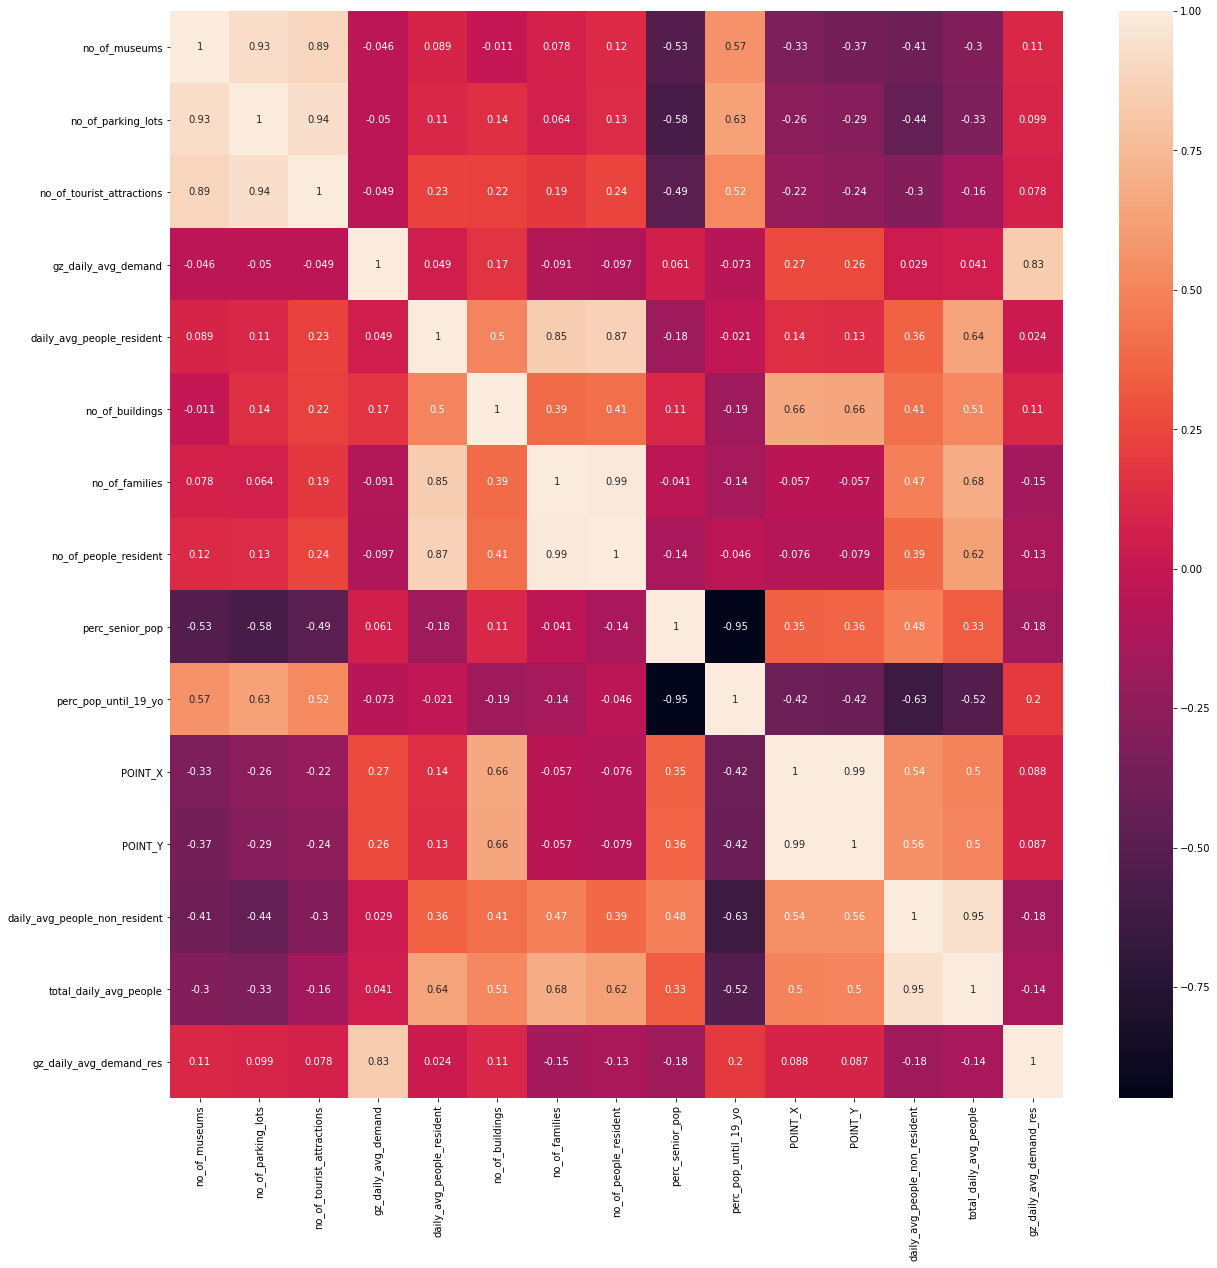

In [10]:
f, ax = plt.subplots(figsize=(20, 20))
correlation_mat = combined_data.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [11]:
correlation_mat['gz_daily_avg_demand_res'].sort_values(ascending=False)

gz_daily_avg_demand_res          1.000000
gz_daily_avg_demand              0.834067
perc_pop_until_19_yo             0.200532
no_of_museums                    0.111314
no_of_buildings                  0.108771
no_of_parking_lots               0.098837
POINT_X                          0.087592
POINT_Y                          0.087063
no_of_tourist_attractions        0.078403
daily_avg_people_resident        0.024185
no_of_people_resident           -0.133158
total_daily_avg_people          -0.138095
no_of_families                  -0.150867
daily_avg_people_non_resident   -0.178673
perc_senior_pop                 -0.184078
Name: gz_daily_avg_demand_res, dtype: float64